### Imports & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import scipy
from scipy import stats
from scipy.stats import skew 
from scipy.stats import kurtosis 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
white_wine_no_out = pd.read_csv(r"C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\white_wine_no_out.csv", sep=',')
white_wine_no_out_tsd = pd.read_csv(r"C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\white_wine_no_out_tsd.csv", sep=',')

In [3]:
# balance the dataset
# feature selection: analyze the impact of the features
# optimize the classification models through hyperparameter tuning
# model and evaluate the approaches

### Split Data


In [4]:
white_wine_no_out_tsd1 = white_wine_no_out_tsd.drop('quality', axis=1)

In [5]:
# Split data into X and Y
X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
y = white_wine_no_out_tsd1['quality_label']

# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Feature Selection Result

In [6]:
white_wine_no_out_tsd1 = white_wine_no_out_tsd.drop(['quality','type'], axis=1)

Model Results

C:\Users\janin\AppData\Local\Temp\ipykernel_25776\1232051682.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=white_wine_no_out_tsd, x='quality', ax=axes[0], palette='Greens').set_title("Class Distribution Before SMOTE", fontsize=12)
C:\Users\janin\AppData\Local\Temp\ipykernel_25776\1232051682.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[1], palette=palette).set_title("Class Distribution Before SMOTE", fontsize=12)
C:\Users\janin\AppData\Local\Temp\ipykernel_25776\1232051682.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

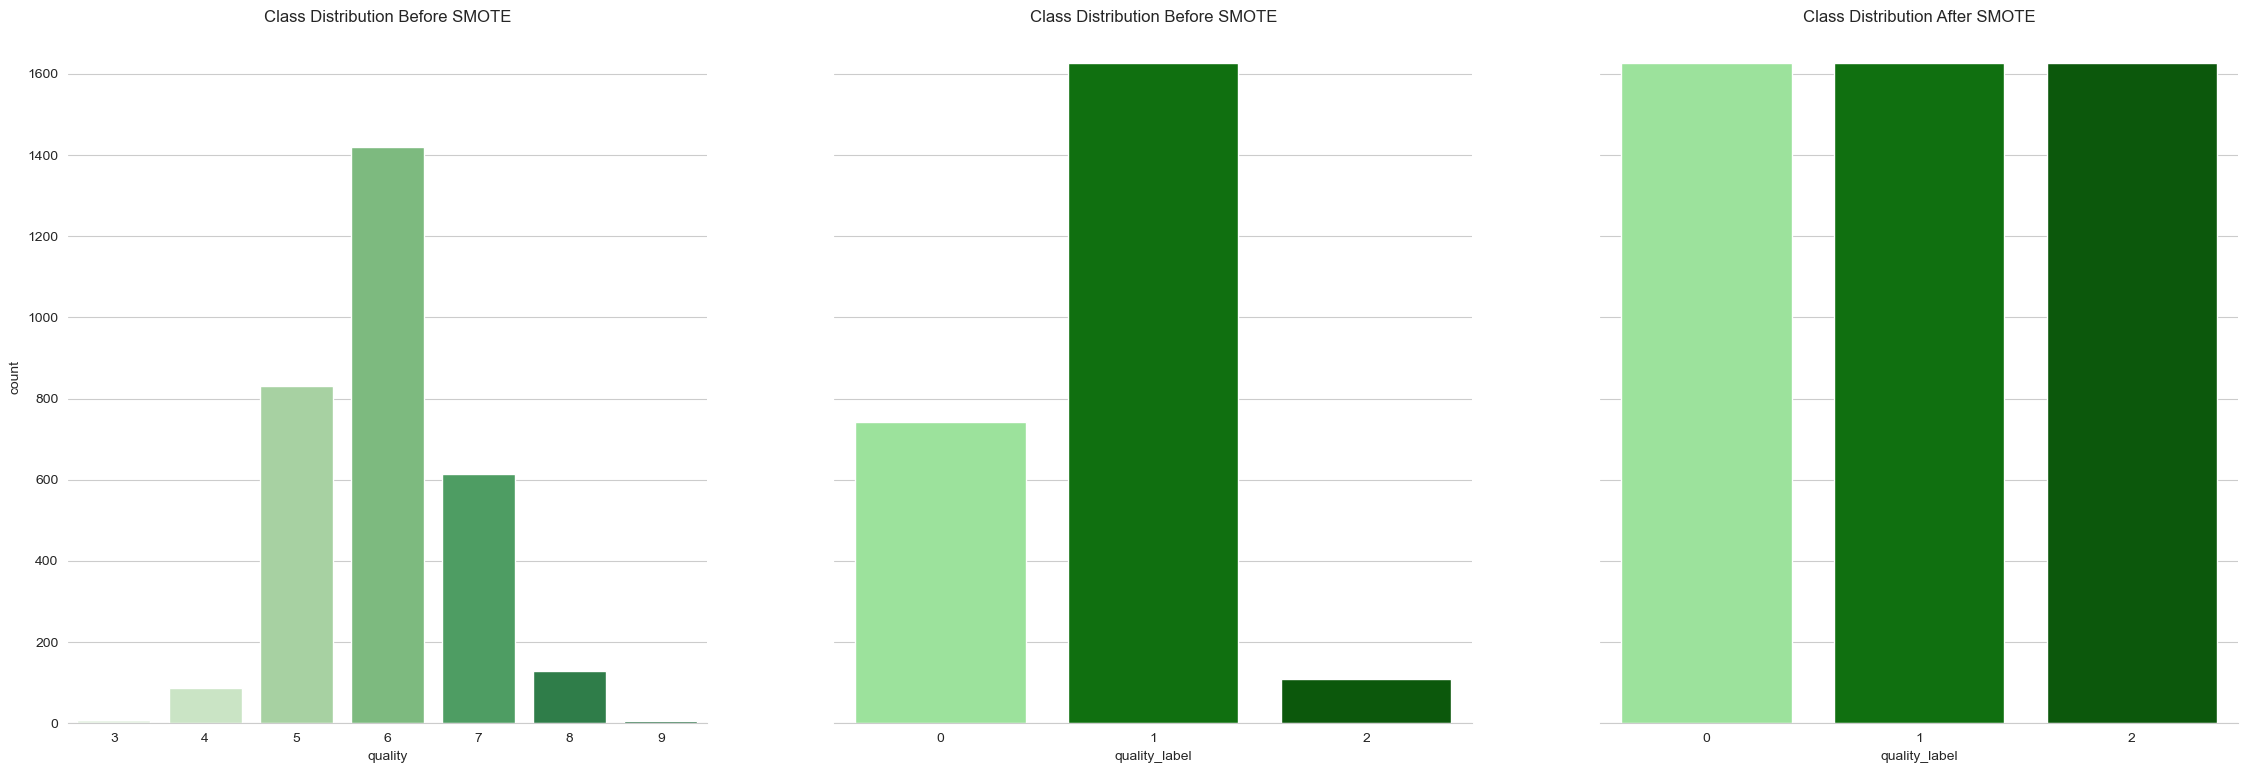

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

sns.set_style("whitegrid")

# Load the dataset
# Replace `white_wine_no_out_tsd1.csv` with the correct file path if it's not in memory
# Assuming `white_wine_no_out_tsd1` is already loaded in a pandas DataFrame.
# X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
# y = white_wine_no_out_tsd1['quality_label']

# Sample data loading (modify as needed)
# white_wine_no_out_tsd1 = pd.read_csv('path/to/white_wine_no_out_tsd1.csv')
X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
y = white_wine_no_out_tsd1['quality_label']

### 1. Balance Data Using SMOTE ###
# Split into train-test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Visualizing class distribution before SMOTE
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 9), sharey=True)
palette = ['lightgreen','green','darkgreen']

#plt.figure(figsize=(6, 4))
sns.countplot(data=white_wine_no_out_tsd, x='quality', ax=axes[0], palette='Greens').set_title("Class Distribution Before SMOTE", fontsize=12)
sns.countplot(x=y_train, ax=axes[1], palette=palette).set_title("Class Distribution Before SMOTE", fontsize=12)
sns.countplot(x=y_train_resampled, ax=axes[2], palette=palette).set_title("Class Distribution After SMOTE", fontsize=12)

sns.despine(ax=axes[0], top=True, right=True, left=True)
sns.despine(ax=axes[1], top=True, right=True, left=True)  # Remove top and rig
sns.despine(ax=axes[2], top=True, right=True, left=True)  # Remove top and rig


C:\Users\janin\AppData\Local\Temp\ipykernel_25776\2333994776.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Greens_r')


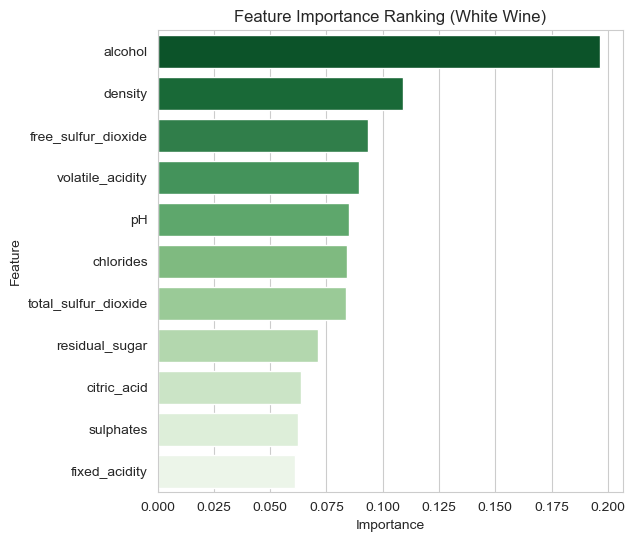

Best RandomForest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7060
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       185
           1       0.79      0.75      0.77       407
           2       0.26      0.37      0.30        27

    accuracy                           0.71       619
   macro avg       0.56      0.59      0.57       619
weighted avg       0.72      0.71      0.71       619



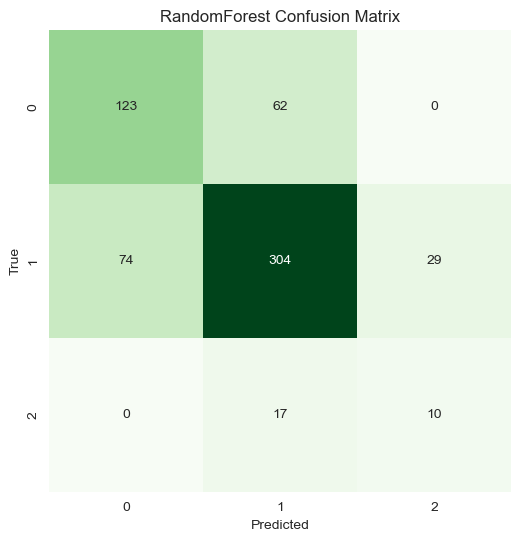

Best SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.6381
              precision    recall  f1-score   support

           0       0.56      0.68      0.61       185
           1       0.79      0.63      0.70       407
           2       0.17      0.44      0.25        27

    accuracy                           0.64       619
   macro avg       0.51      0.58      0.52       619
weighted avg       0.70      0.64      0.66       619



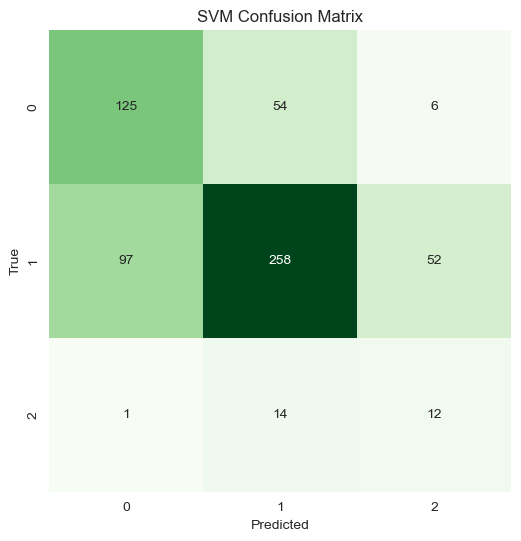

c:\Users\janin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best ANN: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Accuracy: 0.6430
              precision    recall  f1-score   support

           0       0.56      0.71      0.63       185
           1       0.79      0.63      0.70       407
           2       0.16      0.33      0.21        27

    accuracy                           0.64       619
   macro avg       0.50      0.56      0.51       619
weighted avg       0.69      0.64      0.66       619



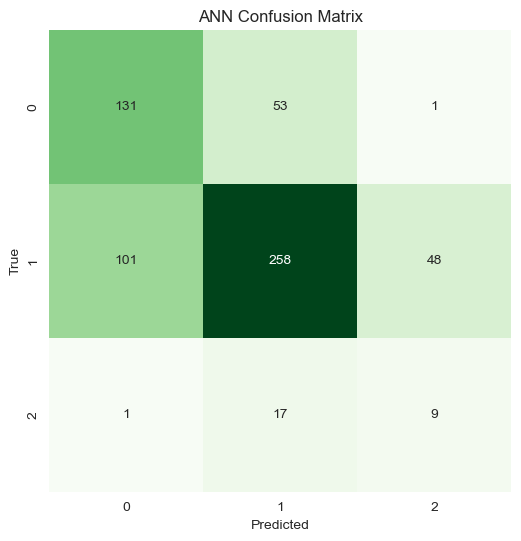

ValueError: Length of values (33) does not match length of index (11)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
y = white_wine_no_out_tsd1['quality_label']

# Step 1: Balance Data Using SMOTE
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


# Step 2: Feature Selection using RandomForest for initial feature ranking
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_resampled, y_train_resampled)

# Rank feature importance
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance for RandomForest
plt.figure(figsize=(6, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Greens_r')
plt.title('Feature Importance Ranking (White Wine)')
plt.show()

# Step 3: Standardization
scaler = StandardScaler()
x_train_resampled_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

# Step 4: Hyperparameter Tuning and Model Training

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}

# Initialize models
models = {
    'RandomForest': (RandomForestClassifier(random_state=42), param_grid_rf),
    'SVM': (SVC(random_state=42), param_grid_svc),
    'ANN': (MLPClassifier(random_state=42), param_grid_ann)
}

# Tune and evaluate each model using GridSearchCV
best_models = {}
results = {}

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train_resampled_scaled, y_train_resampled)
    best_models[model_name] = grid_search.best_estimator_
    
    # Predictions and evaluation
    preds = best_models[model_name].predict(x_test_scaled)
    accuracy = accuracy_score(y_test, preds)
    results[model_name] = accuracy
    
    print(f"Best {model_name}: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, preds))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, square=True)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Step 5: Feature Impact on Model Performance

# Initialize a DataFrame to hold the feature impact results
feature_impact_df = pd.DataFrame(index=X.columns)

# Collect feature importance for RandomForest
feature_impact_df['RandomForest'] = rf.feature_importances_

# For SVM, we can use the absolute values of the coefficients if using a linear kernel
svc_linear = SVC(kernel='linear').fit(x_train_resampled_scaled, y_train_resampled)
feature_impact_df['SVM'] = np.abs(svc_linear.coef_).flatten()

# For ANN, we do not directly have feature importance, but we can use permutation importance
# from sklearn.inspection import permutation_importance is an option if required for ANN.
# For simplicity, we'll leave ANN without feature-specific ranking.

# Normalizing the results for visualization (0 to 1 range)
feature_impact_df = feature_impact_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

# Plot the performance results for each model against the features
plt.figure(figsize=(12, 6))
for col in feature_impact_df.columns:
    plt.plot(feature_impact_df.index, feature_impact_df[col], marker='o', label=f'{col}-Test')
    
plt.title('Performance Analysis of Features on Different Models')
plt.xlabel('Features')
plt.ylabel('Performance result (in 0-1 range)')
plt.xticks(rotation=45)
plt.legend(title='Keys')
plt.grid(True)
plt.show()



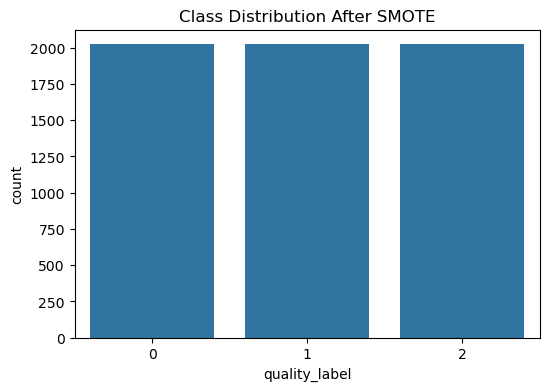

C:\Users\janin\AppData\Local\Temp\ipykernel_27676\1917778378.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


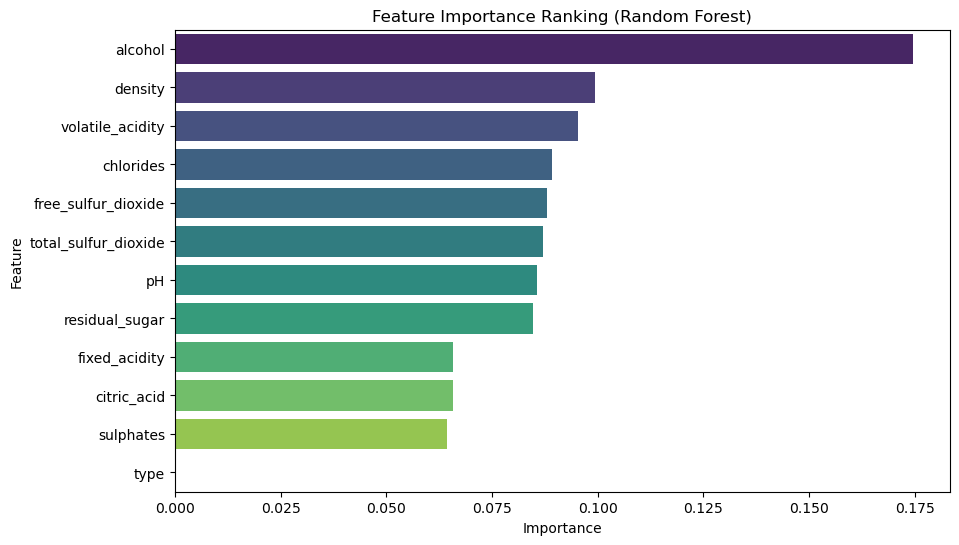

c:\Users\janin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
X = white_wine_no_out_tsd1.drop('quality_label', axis=1)
y = white_wine_no_out_tsd1['quality_label']

# Step 1: Balance Data Using SMOTE
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Visualize class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()

# Step 2: Feature Selection using RandomForest for initial feature ranking
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_resampled, y_train_resampled)

# Rank feature importance
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance for RandomForest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance Ranking (Random Forest)')
plt.show()

# Step 3: Standardization
scaler = StandardScaler()
x_train_resampled_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

# Step 4: Hyperparameter Tuning and Model Training

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}

# Initialize models
models = {
    'RandomForest': (RandomForestClassifier(random_state=42), param_grid_rf),
    'SVM': (SVC(random_state=42), param_grid_svc),
    'ANN': (MLPClassifier(random_state=42), param_grid_ann)
}

# Tune and evaluate each model using GridSearchCV
best_models = {}
results = {}

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train_resampled_scaled, y_train_resampled)
    best_models[model_name] = grid_search
